# 일러스트 파일(.ai) -> SVG 파일로 변환
- WSL2에 Inkscape 설치 및 활용
    - sudo apt update
    - sudo apt install inkscape
    - inkscape --version

In [6]:
import subprocess
import os
import glob

# --- 설정 (WSL2 경로 형식으로 수정) ---
# AI 파일들이 있는 폴더 (예: Windows의 'C:\ai_files' 폴더)
input_folder = "./sample_data"

# SVG 파일들을 저장할 폴더 (예: Windows의 'C:\svg_output' 폴더)
output_folder = "./svg_output"
# --- ---

# 출력 폴더가 없으면 생성
os.makedirs(output_folder, exist_ok=True)

# 입력 폴더에서 모든 .ai 파일 목록 가져오기
# os.path.join은 실행 환경(WSL2)에 맞춰 자동으로 '/'를 사용해 경로를 만듭니다.
search_path = os.path.join(input_folder, '*.ai')
ai_files = glob.glob(search_path)

if not ai_files:
    print(f"'{input_folder}'에서 AI 파일을 찾을 수 없습니다.")
else:
    print(f"총 {len(ai_files)}개의 파일을 변환합니다...")

    for ai_path in ai_files:
        # 파일명 추출
        file_name_without_ext = os.path.splitext(os.path.basename(ai_path))[0]
        
        # 저장될 SVG 파일의 전체 경로 생성
        svg_path = os.path.join(output_folder, f"{file_name_without_ext}.svg")
        
        # Inkscape 실행 명령어 (코드 자체는 Windows 버전과 동일)
        command = [
            "inkscape",
            ai_path,
            f"--export-plain-svg={svg_path}"
        ]
        
        print(f"-> 변환 중: {os.path.basename(ai_path)}")
        
        try:
            # WSL2의 Inkscape를 사용하여 명령어 실행
            subprocess.run(command, check=True, capture_output=True, text=True)
            print(f"   ✅ 성공: {svg_path}")
        except subprocess.CalledProcessError as e:
            print(f"   ❌ 실패: {os.path.basename(ai_path)}")
            print(f"      Error: {e.stderr}") # 에러 원인 확인 시 주석 해제

    print("\n모든 작업이 완료되었습니다.")

총 1개의 파일을 변환합니다...
-> 변환 중: 250718_01.ai
   ✅ 성공: ./svg_output/250718_01.svg

모든 작업이 완료되었습니다.


# SVG 파일 시각화 하기

In [8]:
from IPython.display import display, SVG, HTML, Image

# 변환된 SVG 파일 경로
svg_file_path = "./svg_output/250718_01.svg"

# 방법 1: SVG 객체로 직접 표시 (가장 권장)
# SVG의 모든 속성을 유지하며 가장 정확하게 표시합니다.
print("--- 1. display.SVG() 사용 ---")
display(SVG(filename=svg_file_path))


# 방법 2: HTML <img> 태그로 표시
# 크기 조절 등 HTML/CSS 속성을 함께 적용하고 싶을 때 유용합니다.
print("\n--- 2. display.HTML() 사용 (크기 조절 예시) ---")
display(HTML(f'<img src="{svg_file_path}" width="900px">'))


--- 1. display.SVG() 사용 ---



--- 2. display.HTML() 사용 (크기 조절 예시) ---


# SVG 파일 XML로 분리하기

총 1개의 레이어를 찾았습니다.

--- 첫 번째 레이어의 XML 내용 ---
<ns0:g xmlns:ns0="http://www.w3.org/2000/svg" xmlns:ns1="http://www.w3.org/1999/xlink" transform="matrix(1.3333333,0,0,-1.3333333,0,1700.7867)" id="g10"><ns0:path id="path12" style="fill:#cceffc;fill-opacity:1;fill-rule:nonzero;stroke:none" d="M 2315.843,722.152 H 534.199 v 458.908 h 1781.644 z" /><ns0:path id="path14" style="fill:#cceffc;fill-opacity:1;fill-rule:nonzero;stroke:none" d="M 2315.843,89.279 H 534.199 v 458.908 h 1781.644 z" /><ns0:path id="path16" style="fill:#cceffc;fill-opacity:1;fill-rule:nonzero;stroke:none" d="m 453.154,132.354 h -360 v 379 h 360 z" /><ns0:path id="path18" style="fill:#cceffc;fill-opacity:1;fill-rule:nonzero;stroke:none" d="m 447.654,756.354 h -349 v 374 h 349 z" /><ns0:g id="g20"><ns0:g clip-path="url(#clipPath26)" id="g22"><ns0:g id="g28"><ns0:g transform="matrix(54,0,0,59,1409.0607,211.12015)" id="g30"><ns0:image id="image36" mask="url(#mask32)" ns1:href="" transform="matrix(1,0,0,-1,0,1)" preserveAspect
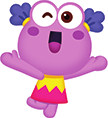
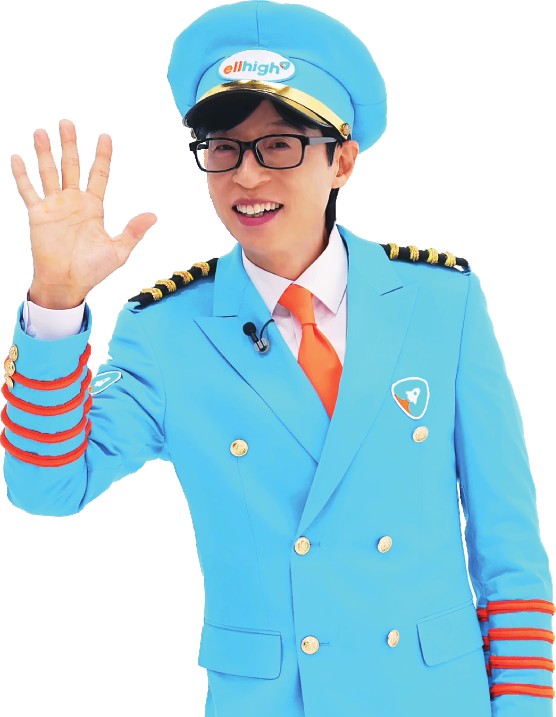
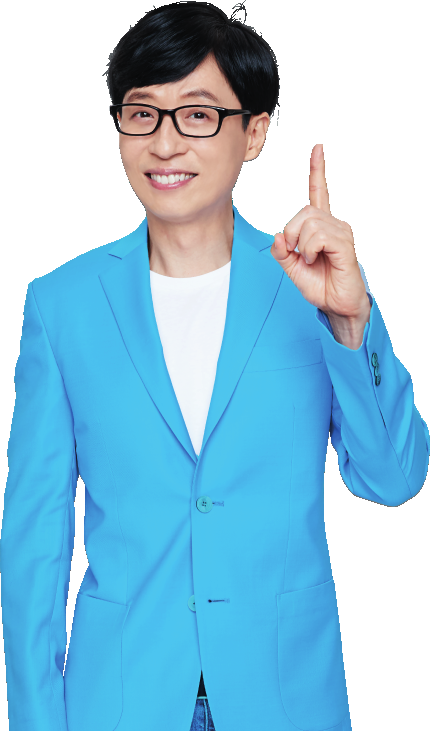
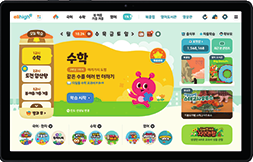
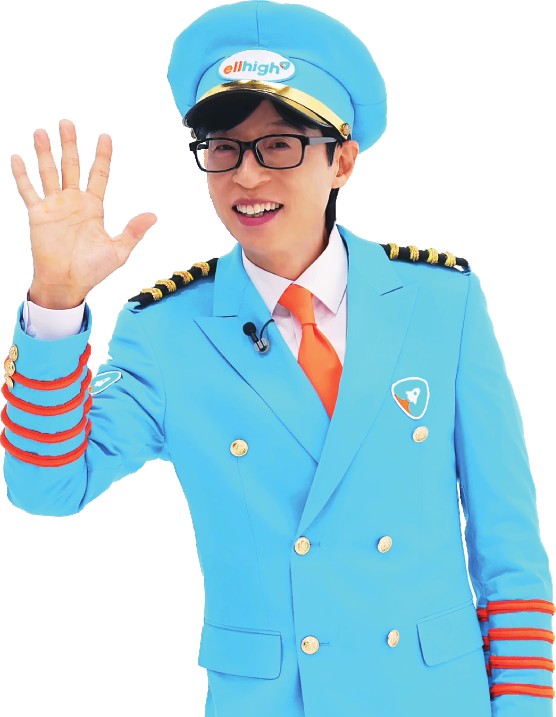
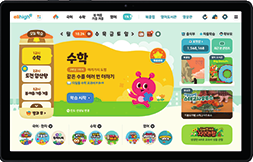
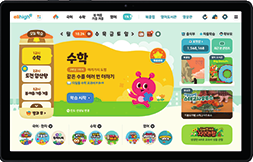

In [9]:
import xml.etree.ElementTree as ET

def extract_svg_layers(svg_file_path):
    """
    SVG 파일에서 각 레이어(<g> 태그)를 찾아 XML 문자열 리스트로 반환합니다.

    Args:
        svg_file_path (str): 분석할 SVG 파일의 경로

    Returns:
        list: 각 레이어의 XML 내용이 담긴 문자열 리스트
    """
    try:
        # SVG 파일을 파싱하기 전에 XML 네임스페이스를 등록해야 할 수 있습니다.
        # SVG 파일 상단을 열어보고 'xmlns' 속성을 확인하세요.
        namespaces = {'svg': 'http://www.w3.org/2000/svg'}
        
        # XML 파일을 파싱합니다.
        tree = ET.parse(svg_file_path)
        root = tree.getroot()

        # 모든 <g> 태그를 찾습니다. Illustrator/Inkscape는 레이어를 <g>로 만듭니다.
        # findall 메서드에 네임스페이스를 적용합니다.
        layers = root.findall('svg:g', namespaces)

        layer_xml_list = []
        for layer in layers:
            # Element를 다시 문자열로 변환합니다.
            # encoding='unicode'는 일반적인 문자열로 결과를 받기 위함입니다.
            layer_str = ET.tostring(layer, encoding='unicode')
            layer_xml_list.append(layer_str)

        return layer_xml_list

    except FileNotFoundError:
        print(f"오류: '{svg_file_path}' 파일을 찾을 수 없습니다.")
        return []
    except ET.ParseError:
        print(f"오류: '{svg_file_path}' 파일은 올바른 XML/SVG 형식이 아닙니다.")
        return []

# --- 사용 예시 ---
svg_file_path = "./svg_output/250718_01.svg" # 실제 SVG 파일 경로로 변경하세요
layers_list = extract_svg_layers(svg_file_path)

if layers_list:
    print(f"총 {len(layers_list)}개의 레이어를 찾았습니다.\n")
    
    # 첫 번째 레이어의 내용만 출력해서 확인
    print("--- 첫 번째 레이어의 XML 내용 ---")
    print(layers_list[0])
    
    # # 모든 레이어의 내용을 보고 싶을 경우
    # for i, layer_xml in enumerate(layers_list):
    #     print(f"\n--- Layer {i+1} ---")
    #     print(layer_xml)

In [11]:
tree = ET.parse(svg_file_path)

In [12]:
root = tree.getroot()

In [13]:
root

<Element '{http://www.w3.org/2000/svg}svg' at 0x79cc6011a1b0>

In [15]:
namespaces = {'svg': 'http://www.w3.org/2000/svg'}
layers = root.findall('svg:g', namespaces)

In [16]:
layers

[<Element '{http://www.w3.org/2000/svg}g' at 0x79cc6015a660>]